Họ tên : Phạm Mai Duy 
MSSV : 22002115
Lớp : DHKTPM18C

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import scipy.stats as stats

1. Đọc dữ liệu lên dataframe

In [85]:
thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')

3. Đổi tên các cột dữ liệu cần thiết 

In [89]:
thietbi.rename(columns={'Retail Branding' : 'Branding', 'Marketing Name' : 'MarketingName'}, inplace=True)

In [90]:
thietbi.head

<bound method NDFrame.head of                          Branding                    MarketingName  \
0                             NaN                              NaN   
1                             NaN                              NaN   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                              3Q                          OC1020A   
5                         7Eleven                            IN265   
6      A.O.I. ELECTRONICS FACTORY                           A.O.I.   
7                       AG Mobile                       AG BOOST 2   
8                       AG Mobile                         AG Flair   
9                       AG Mobile               AG Go Tab Access 2   
10                      AG Mobile                        AG Ultra2   
11                      AG Mobile                 AG_Go-Tab_Access   
12                      AG Mobile                       AG_T

4. Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng 
kết quả có các cột sau: [outgoing_mins_per_month, outgoing_sms_per_month, 
monthly_mb, use_id, platform, device] 

In [91]:
dfKetQua = pd.merge(nguoidung_sudung,
nguoidung_thietbi[['use_id', 'platform', 'device']],
on='use_id')

In [92]:
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


5. Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong 
bảng kết quả cuối cùng. Lưu ý ở đây khóa liên kết sẽ khác tên

In [93]:
# inner-join
dfKetQua = pd.merge(dfKetQua, thietbi[['Branding', 'Model']], left_on='device', right_on='Model')

In [94]:
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505


6. Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT

In [95]:
dfKetQua[dfKetQua['device'].str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505


7. Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng 
sử dụng của các nhãn hàng 

In [97]:
dfKetQua.groupby('Branding').agg({
    'outgoing_mins_per_month': 'mean', 
    'outgoing_sms_per_month': 'mean', 
    'monthly_mb': 'mean',              
    'use_id': 'count'                 
})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


8. Trực quan số lượng người dùng các nhãn hàng 

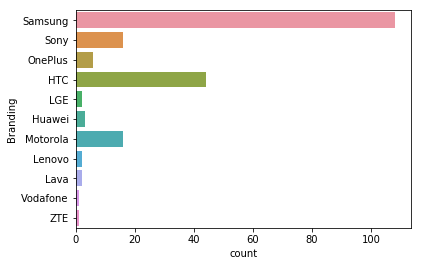

In [98]:
sns.countplot(y= "Branding" ,data=  dfKetQua)
plt.show()


9. Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên 
từng nhóm nhãn hàng bán lẻ 

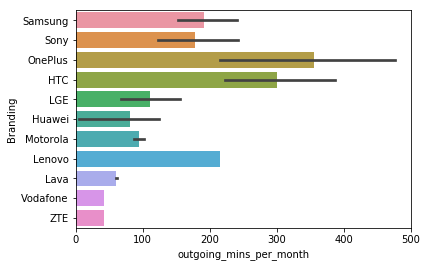

In [105]:
sns.barplot(x = 'outgoing_mins_per_month' ,y='Branding', data=dfKetQua ,errorbar=None )
plt.show()

10. Khảo sát tương quan giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng

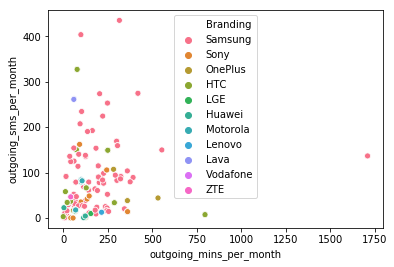

In [109]:
sns.scatterplot(
    y = 'outgoing_sms_per_month',
    x = 'outgoing_mins_per_month',
    hue='Branding',
    data= dfKetQua
)
plt.show()

11. Hãy kiểm định xem trung bình outgoing_mins_per_month có bằng 200 phút 

In [112]:
stats.ttest_1samp(dfKetQua['outgoing_mins_per_month'], popmean=200)
#apha = 0.05
# p-value = 0.713 >  apha 
#Chấp nhận H0

Ttest_1sampResult(statistic=0.3678324474067914, pvalue=0.7133871524810332)

12. Hãy kiểm định xem trung bình outgoing_sms_per_month có bằng 100 tin nhắn 

In [113]:
stats.ttest_1samp(dfKetQua['outgoing_sms_per_month'], popmean=100)
#apha = 0.05
# p-value = 0.003 <  apha 
#Bác bỏ H0, không đủ bằng chức để dữ liệu outgoing_sms_per_month bằng 100

Ttest_1sampResult(statistic=-2.9567085781961246, pvalue=0.0034834938502051878)

13. Hãy kiểm định xem trung bình monthly_mb có bằng 2048 mb 

In [114]:
stats.ttest_1samp(dfKetQua['monthly_mb'], popmean=2048)
#apha = 0.05
# p-value = 1.39*10^-8 <  apha 
##Bác bỏ H0, không đủ bằng chức để dữ liệu monthly_mb bằng 2048

Ttest_1sampResult(statistic=5.918078326415772, pvalue=1.3950238813156428e-08)

14. Hãy tạo ma trận tương quan giữa [outgoing_mins_per_month, outgoing_sms_per_month, 
monthly_mb] và sắp xếp tăng dần về mức độ tương quan 

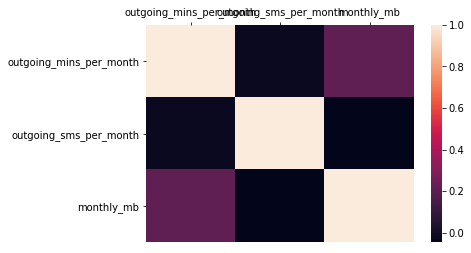

In [115]:
sns.heatmap(dfKetQua[['outgoing_mins_per_month','outgoing_sms_per_month','monthly_mb']].corr(), vmax=1.0, square=False).xaxis.tick_top()

15. Kiểm định xem outgoing_mins_per_month, outgoing_sms_per_month có tương quan 

In [119]:
from scipy.stats.stats import pearsonr

pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])

#apha = 0.05
# p-value =0.8162  > apha 
#Chấp nhận H0, không có đủ bằng chứng để kết luận rằng có mối quan hệ tương quan giữa outgoing_mins_per_month và outgoing_sms_per_month
#Hệ số tương quan rất gần 0 (-0.0165), cho thấy mối quan hệ giữa hai biến này rất yếu, gần như không có.


(-0.01649444168531942, 0.8162223636414565)

16. Hãy kiểm định xem có mối quan hệ nào giữa platform và branding 

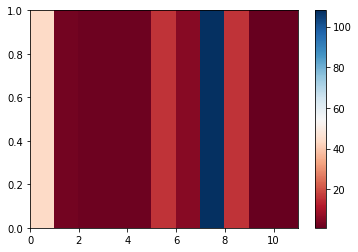

p value is 1.0
Independent (H0 holds true)


In [131]:
from scipy.stats import chi2_contingency

crosdata = pd.crosstab(dfKetQua['platform'], [dfKetQua['Branding']], rownames=['platform'], colnames=['Branding'])
crosdata

import matplotlib.pyplot as plt
plt.pcolor(crosdata,cmap='RdBu')
plt.colorbar()
plt.show()

stat, p, dof, expected = chi2_contingency(crosdata)
 
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')






17. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform

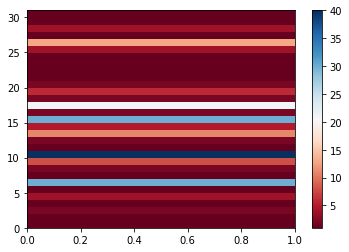

p value is 1.0
Independent (H0 holds true)


In [125]:
crosdata = pd.crosstab(dfKetQua['monthly_mb'], [dfKetQua['platform']], rownames=['monthly_mb'], colnames=['platform'])
crosdata

import matplotlib.pyplot as plt
plt.pcolor(crosdata,cmap='RdBu')
plt.colorbar()
plt.show()

stat, p, dof, expected = chi2_contingency(crosdata)
 
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


18. Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform theo loại branding 

In [137]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('monthly_mb ~ platform + Branding + platform:Branding',data=dfKetQua).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)
#apha = 0.05
# p-value =0.466796  > apha 
#Chấp nhận H0, là monthly_mb =platform 

                      df        sum_sq       mean_sq         F    PR(>F)
platform             0.0  0.000000e+00           NaN       NaN       NaN
Branding            10.0  2.792153e+08  2.792153e+07  0.974799  0.466796
platform:Branding    0.0  0.000000e+00           NaN       NaN       NaN
Residual           190.0  5.442239e+09  2.864336e+07       NaN       NaN


d:\USERS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
d:\USERS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
d:\USERS\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


19. Phân tích sự ảnh hưởng của outgoing_mins_per_month, outgoing_sms_per_month đến 
monthly_mb dựa trên mô hình hồi quy tuyến tính 

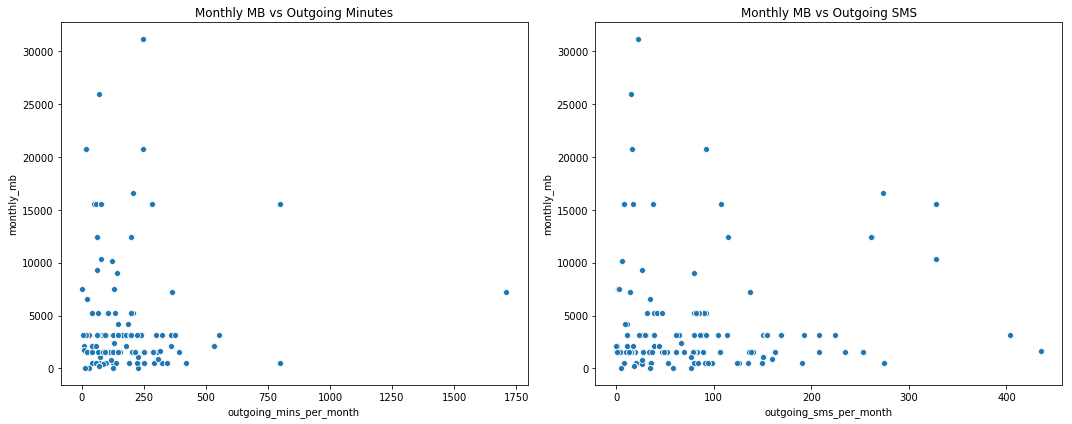

In [144]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
sns.scatterplot(data=dfKetQua, x='outgoing_mins_per_month', y='monthly_mb', ax=axes[0])
axes[0].set_title('Monthly MB vs Outgoing Minutes')
    
sns.scatterplot(data=dfKetQua, x='outgoing_sms_per_month', y='monthly_mb', ax=axes[1])
axes[1].set_title('Monthly MB vs Outgoing SMS')
    
plt.tight_layout()
plt.show()


